Data 620 Web Analytics

Summer 2023 - Final Project

Khyati Naik

Laura Puebla

Video Link : https://www.youtube.com/watch?v=2gp0jh1Ggzk

Research Questions:

How does the sentiment towards food products change over time in Amazon Fine Food Reviews?

How do customer sentiments differ between organic and non-organic food products based on Amazon Fine Food Reviews?


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# URL of the Reviews.csv file on GitHub
url = 'https://media.githubusercontent.com/media/Naik-Khyati/data620_final_project/main/Reviews.csv'

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(url)

In [ ]:
data.shape

(568454, 10)

In [ ]:
print(data.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


Dataset Overview:
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitalit

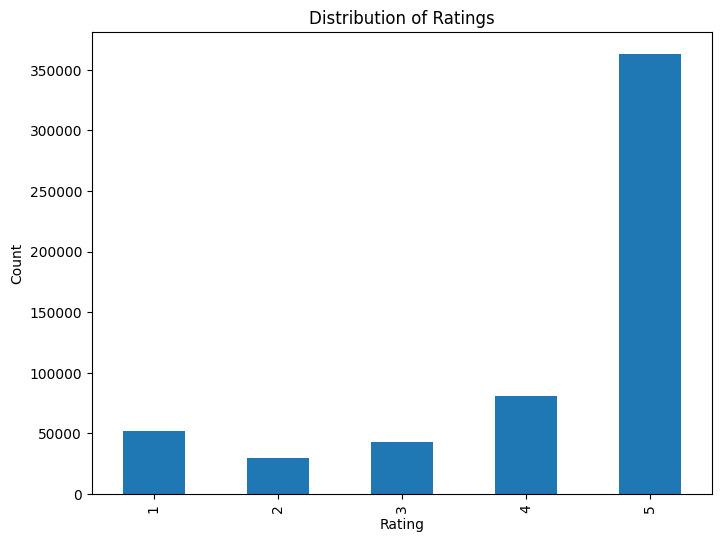


Number of Reviews per Product:
B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

Number of Reviews per User:
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A2O8OFVSTO9PF3      1
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256059, dtype: int64


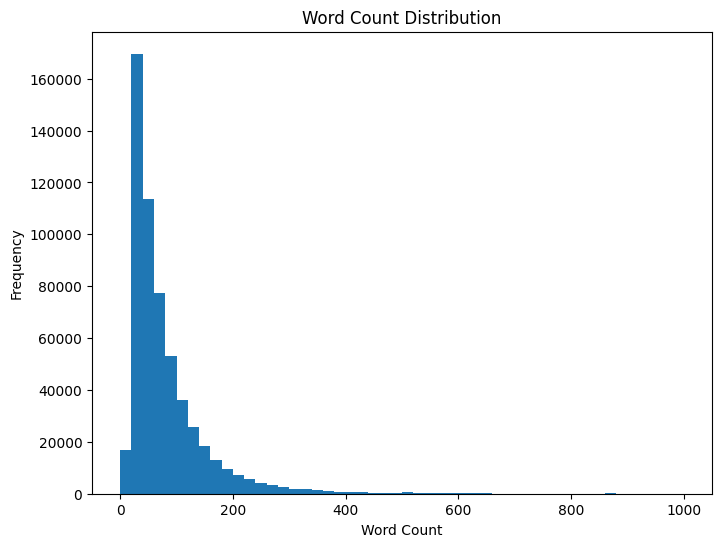

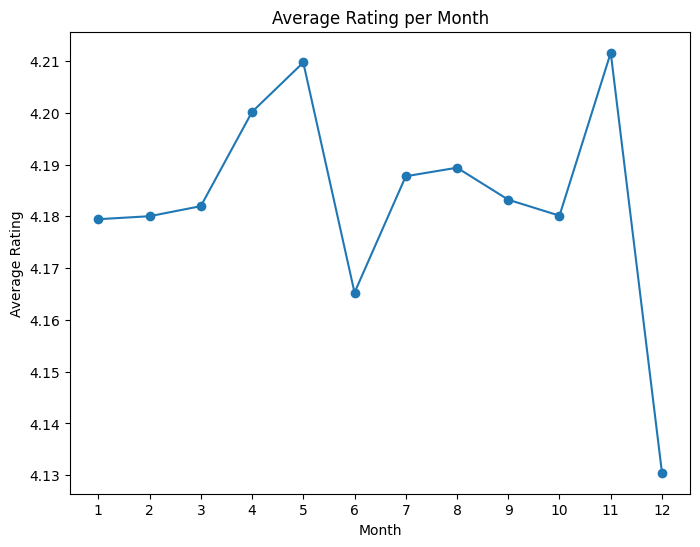

In [ ]:
# Exploratory Data Analysis
# Overview of the dataset
print("Dataset Overview:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Distribution of ratings
plt.figure(figsize=(8, 6))
data['Score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

# Number of reviews per product
reviews_per_product = data['ProductId'].value_counts()
print("\nNumber of Reviews per Product:")
print(reviews_per_product)

# Number of reviews per user
reviews_per_user = data['UserId'].value_counts()
print("\nNumber of Reviews per User:")
print(reviews_per_user)

# Word count distribution
data['WordCount'] = data['Text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
plt.hist(data['WordCount'], bins=50, range=(0, 1000))
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Word Count Distribution')
plt.show()

# Average rating per month
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data['Month'] = data['Time'].dt.month
avg_rating_per_month = data.groupby('Month')['Score'].mean()
plt.figure(figsize=(8, 6))
avg_rating_per_month.plot(marker='o')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.title('Average Rating per Month')
plt.xticks(range(1, 13))
plt.show()

**How does the sentiment towards food products change over time in Amazon Fine Food Reviews?**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


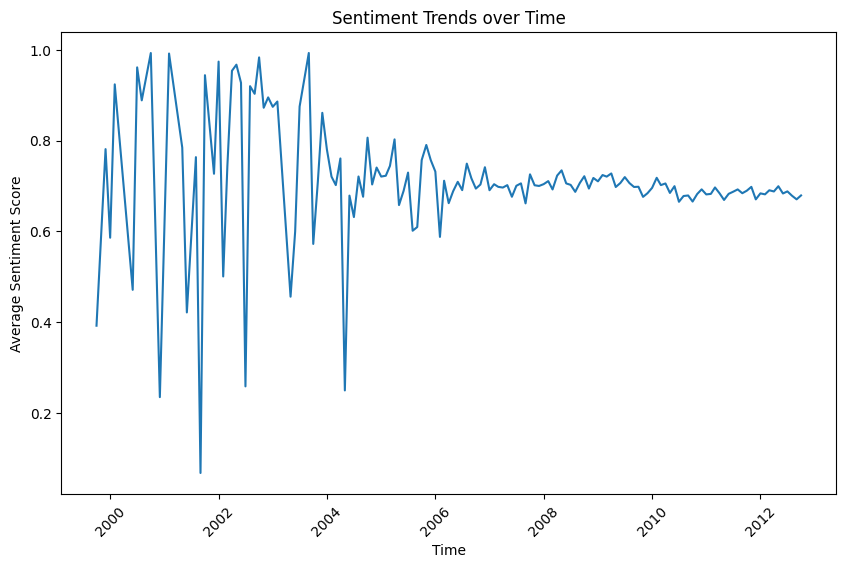

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.dates as mdates

# Preprocess the data (example: remove stopwords, lowercase, and tokenize)
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    tokens = [token for token in tokens if token not in stop_words and token not in punctuations]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

data['ProcessedText'] = data['Text'].apply(preprocess_text)

# Convert the "Time" column to datetime format
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Set the start and end values of the date range
start_date = data['Time'].min()
end_date = data['Time'].max()

# Perform sentiment analysis using VADER
sia = SentimentIntensityAnalyzer()
data['SentimentScore'] = data['ProcessedText'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Group the data by time intervals (e.g., monthly)
data['Month'] = data['Time'].dt.to_period('M')
sentiment_trends = data.groupby('Month')['SentimentScore'].mean()

# Convert Period index to string for plotting
sentiment_trends.index = sentiment_trends.index.astype(str)

# Convert the index of the sentiment_trends dataframe to datetime for correct date range
sentiment_trends.index = pd.to_datetime(sentiment_trends.index)

# Convert the datetime values to numeric format for the x-axis
x = mdates.date2num(sentiment_trends.index)

# Create the plot to visualize the sentiment trends over time
plt.figure(figsize=(10, 6))
plt.plot(x, sentiment_trends.values)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))

plt.xticks(rotation=45)
plt.title('Sentiment Trends over Time')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')

plt.show()

In [2]:
print('start_date')

start_date


**How do customer sentiments differ between organic and non-organic food products based on Amazon Fine Food Reviews?**

In [ ]:
# Data Pre Processing
# Select relevant columns
data = data[['Text', 'Score']]

# Remove duplicates
data = data.drop_duplicates()

# Remove missing values
data = data.dropna()

# Convert scores to positive (1) or negative (0) sentiment
data['Sentiment'] = data['Score'].apply(lambda score: 1 if score > 3 else 0)

# Clean text by removing special characters, numbers, and converting to lowercase
data['CleanedText'] = data['Text'].str.replace('[^a-zA-Z]', ' ')
data['CleanedText'] = data['CleanedText'].str.lower()

# Remove short reviews with less than 3 words
data = data[data['CleanedText'].apply(lambda x: len(x.split()) > 2)]

<ipython-input-65-c016603a04a8>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  data['CleanedText'] = data['Text'].str.replace('[^a-zA-Z]', ' ')


In [ ]:
# Filter organic and non-organic food reviews
organic_reviews = data[data['Text'].str.contains('organic', case=False)]
non_organic_reviews = data[~data['Text'].str.contains('organic', case=False)]

# Perform sentiment analysis
sia = SentimentIntensityAnalyzer()

organic_reviews['SentimentScore'] = organic_reviews['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
non_organic_reviews['SentimentScore'] = non_organic_reviews['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Comparison of sentiment scores
organic_sentiment_mean = organic_reviews['SentimentScore'].mean()
non_organic_sentiment_mean = non_organic_reviews['SentimentScore'].mean()

print("Sentiment Score Comparison:")
print("Organic Food Sentiment Score Mean:", organic_sentiment_mean)
print("Non-organic Food Sentiment Score Mean:", non_organic_sentiment_mean)

# Comparison of sentiment distribution
organic_reviews['SentimentLabel'] = organic_reviews['SentimentScore'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
non_organic_reviews['SentimentLabel'] = non_organic_reviews['SentimentScore'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

organic_sentiment_distribution = organic_reviews['SentimentLabel'].value_counts(normalize=True)
non_organic_sentiment_distribution = non_organic_reviews['SentimentLabel'].value_counts(normalize=True)

print("\nSentiment Distribution Comparison:")
print("Organic Food Sentiment Distribution:")
print(organic_sentiment_distribution)
print("\nNon-organic Food Sentiment Distribution:")
print(non_organic_sentiment_distribution)

<ipython-input-66-4d995e0c96c4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_reviews['SentimentScore'] = organic_reviews['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


Sentiment Score Comparison:
Organic Food Sentiment Score Mean: 0.7490106892307692
Non-organic Food Sentiment Score Mean: 0.6395193297193609

Sentiment Distribution Comparison:
Organic Food Sentiment Distribution:
Positive    0.920062
Negative    0.079938
Name: SentimentLabel, dtype: float64

Non-organic Food Sentiment Distribution:
Positive    0.874176
Negative    0.125824
Name: SentimentLabel, dtype: float64


<ipython-input-66-4d995e0c96c4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_organic_reviews['SentimentScore'] = non_organic_reviews['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
<ipython-input-66-4d995e0c96c4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_reviews['SentimentLabel'] = organic_reviews['SentimentScore'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
<ipython-input-66-4d995e0c96c4>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl